# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=3000, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
#conhecendo o dataset
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


#### Questão 1

In [7]:
#coletando amostra aleatória de tamanho 3000 da coluna altura 
aux = get_sample(athletes, "height", n=3000)

H0 = A amostra foi retirada de um conjunto de dados normalmente distribuidos

H1 = A amostra não provém de um conjunto de dados normalmente distribuidos

Nível de significância do teste (alpha) = 0,05


In [8]:
stat,p = sct.shapiro(aux)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Não rejeita H0')
else:
    print('Rejeita H0')


stat=0.996, p=0.000
Rejeita H0


(array([0.0101626 , 0.0203252 , 0.0203252 , 0.0203252 , 0.06097561,
        0.18292683, 0.29471545, 0.91463415, 1.43292683, 2.02235772,
        3.1504065 , 3.07926829, 3.51626016, 3.05894309, 3.52642276,
        2.62195122, 2.00203252, 1.9004065 , 0.93495935, 0.77235772,
        0.39634146, 0.36585366, 0.14227642, 0.0203252 , 0.0203252 ]),
 array([1.33  , 1.3628, 1.3956, 1.4284, 1.4612, 1.494 , 1.5268, 1.5596,
        1.5924, 1.6252, 1.658 , 1.6908, 1.7236, 1.7564, 1.7892, 1.822 ,
        1.8548, 1.8876, 1.9204, 1.9532, 1.986 , 2.0188, 2.0516, 2.0844,
        2.1172, 2.15  ]),
 <a list of 25 Patch objects>)

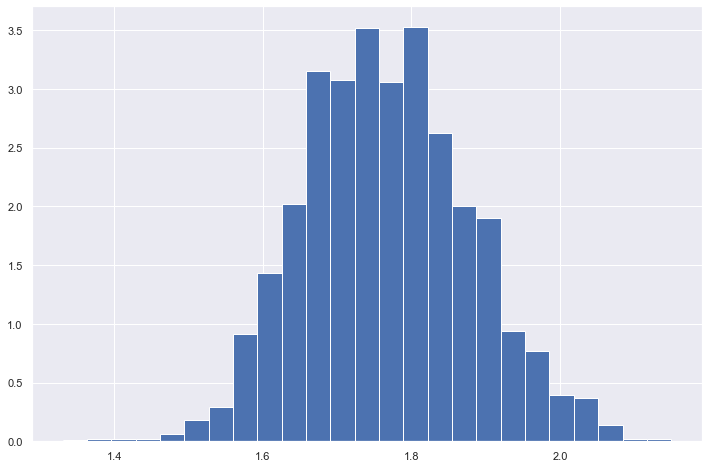

In [9]:
plt.hist(aux, bins=25, density = True)

((array([-3.50184707, -3.25811987, -3.12333914, ...,  3.12333914,
          3.25811987,  3.50184707]),
  array([1.33, 1.37, 1.38, ..., 2.11, 2.13, 2.15])),
 (0.11228392813612542, 1.7667799999999998, 0.9980655667713949))

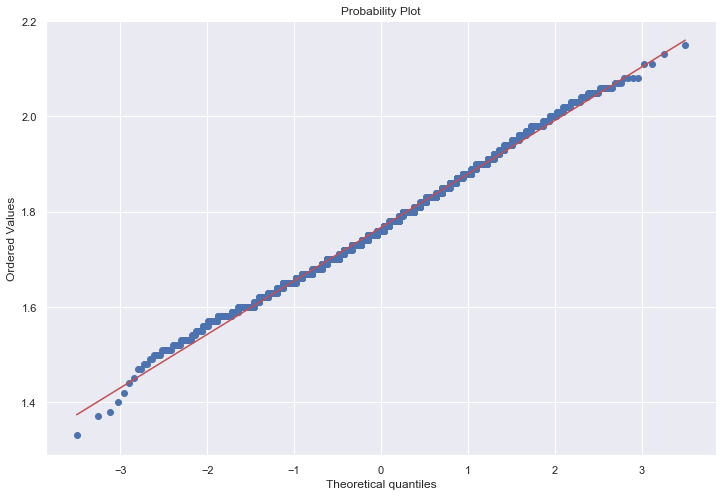

In [10]:
# utilizando outro método
sct.probplot(aux, dist = 'norm', plot = plt)

#### Questão 2

In [11]:
stat_jb, pv = sct.jarque_bera(aux)
print('stat_jb =%.3f, pv =%.3f' % (stat_jb, pv))

stat_jb =13.034, pv =0.001


## Aplicando os testes para uma amostra pequena

In [12]:
aux2 = get_sample(athletes, "height", n=300)

**Teste Shapiro Wilk**

In [13]:
teste1, p_valor =sct.shapiro(aux2)
print('teste1 =%.3f, p_valor =%.3f' % (teste1, p_valor))
p_valor > 0.05

teste1 =0.993, p_valor =0.144


True

(array([0.25423729, 0.33898305, 1.01694915, 1.01694915, 3.89830508,
        2.11864407, 4.40677966, 3.30508475, 3.13559322, 2.45762712,
        1.44067797, 0.93220339, 0.33898305, 0.50847458, 0.25423729]),
 array([1.49      , 1.52933333, 1.56866667, 1.608     , 1.64733333,
        1.68666667, 1.726     , 1.76533333, 1.80466667, 1.844     ,
        1.88333333, 1.92266667, 1.962     , 2.00133333, 2.04066667,
        2.08      ]),
 <a list of 15 Patch objects>)

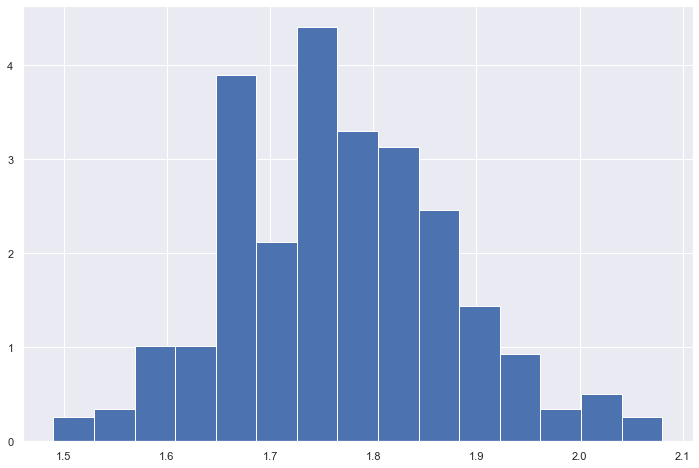

In [14]:
plt.hist(aux2, bins=15, density = True)

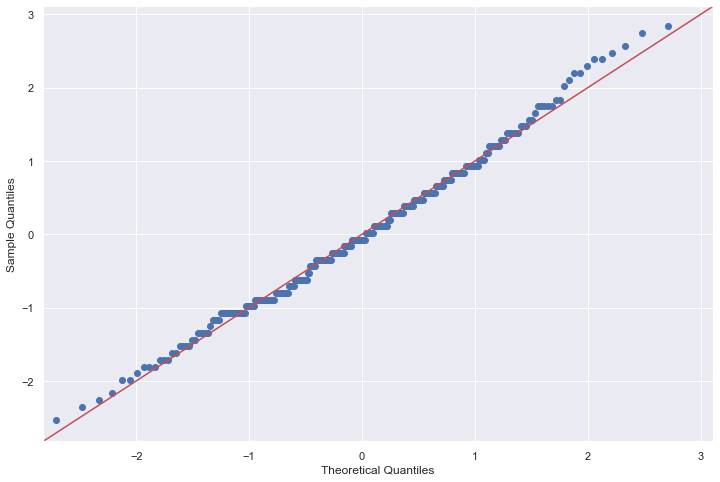

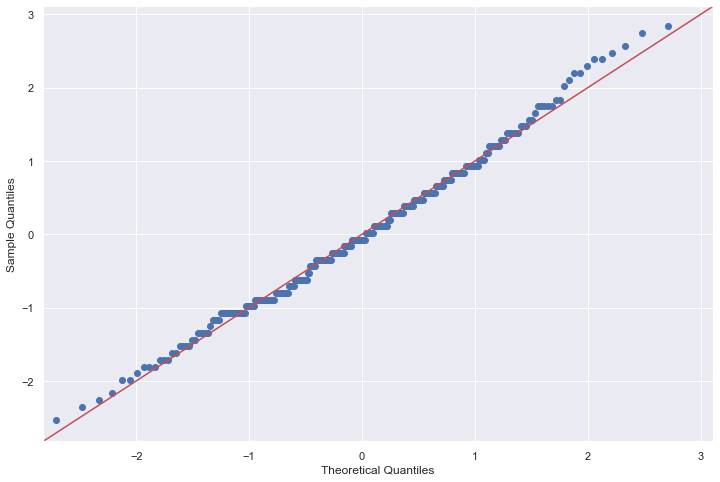

In [15]:
sm.qqplot(aux2, fit = True, line="45")

**Teste de Jarque-Bera**

In [16]:
stat_jb2, pv_2 = sct.jarque_bera(aux2)
print('stat_jb2 =%.3f, pv_2 =%.3f' % (stat_jb2, pv_2))
pv_2 > alpha

stat_jb2 =3.148, pv_2 =0.207


True

#### Questão 3

**Teste de D'Agostino-Pearson para a variável weigth**

In [17]:
# obtendo a amostra para a variável weight
amostra_weight= get_sample(athletes, "weight", n=3000)

In [18]:
statistic, pvalue = sct.normaltest(amostra_weight)
print('statistic =%.3f, pvalue =%.3f' % (statistic, pvalue))


statistic =510.247, pvalue =0.000


((array([-3.50184707, -3.25811987, -3.12333914, ...,  3.12333914,
          3.25811987,  3.50184707]),
  array([ 37.,  39.,  39., ..., 159., 160., 160.])),
 (15.94526085595994, 72.12266666666666, 0.9733842945053893))

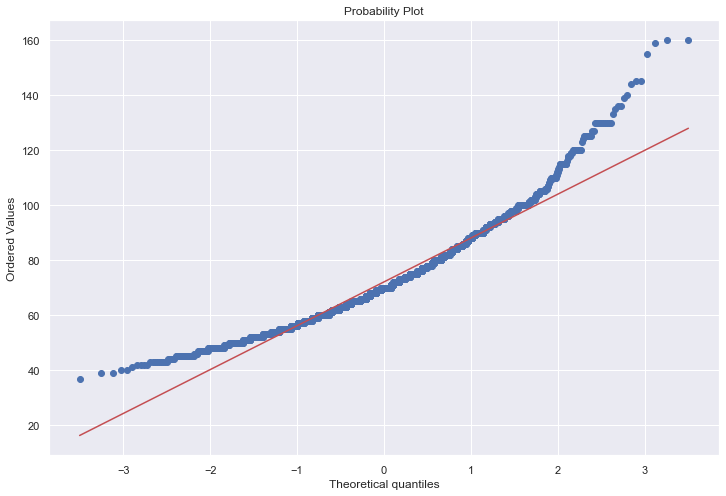

In [19]:
sct.probplot(amostra_weight, fit=True , plot = plt)

(array([4.06504065e-04, 2.84552846e-03, 9.34959350e-03, 1.98509485e-02,
        2.33739837e-02, 2.91327913e-02, 2.54742547e-02, 2.54742547e-02,
        1.76151762e-02, 1.44986450e-02, 1.06368564e-02, 9.07859079e-03,
        5.75880759e-03, 3.25203252e-03, 1.62601626e-03, 1.28726287e-03,
        1.28726287e-03, 6.09756098e-04, 8.13008130e-04, 1.35501355e-04,
        2.71002710e-04, 2.03252033e-04, 0.00000000e+00, 6.77506775e-05,
        2.03252033e-04]),
 array([ 37.  ,  41.92,  46.84,  51.76,  56.68,  61.6 ,  66.52,  71.44,
         76.36,  81.28,  86.2 ,  91.12,  96.04, 100.96, 105.88, 110.8 ,
        115.72, 120.64, 125.56, 130.48, 135.4 , 140.32, 145.24, 150.16,
        155.08, 160.  ]),
 <a list of 25 Patch objects>)

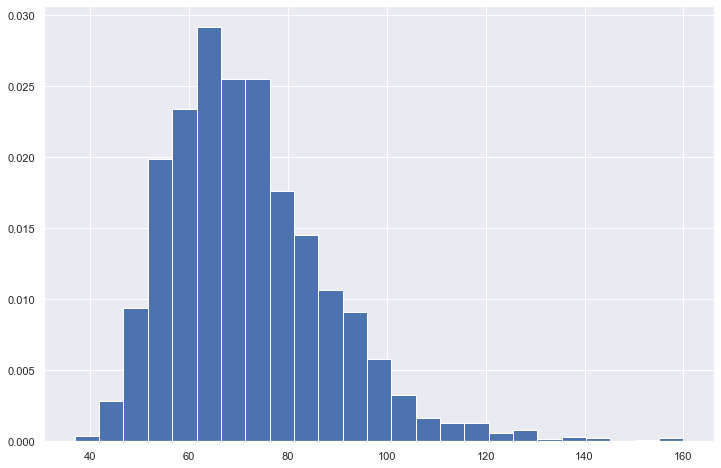

In [20]:
plt.hist(amostra_weight, bins=25, density = True)

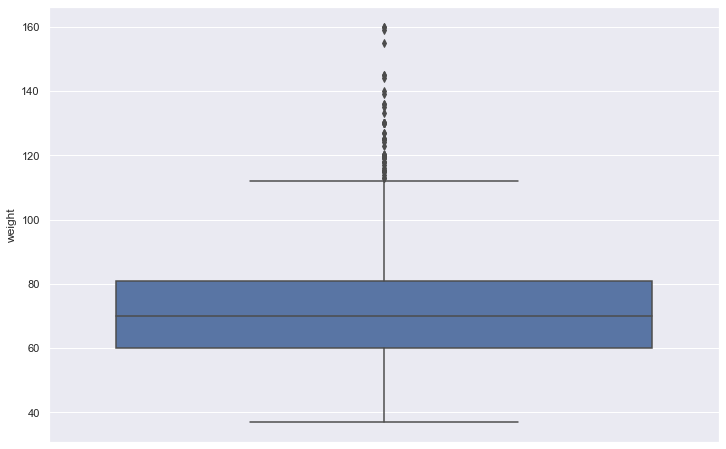

In [21]:
sns.boxplot(amostra_weight, orient = "v")

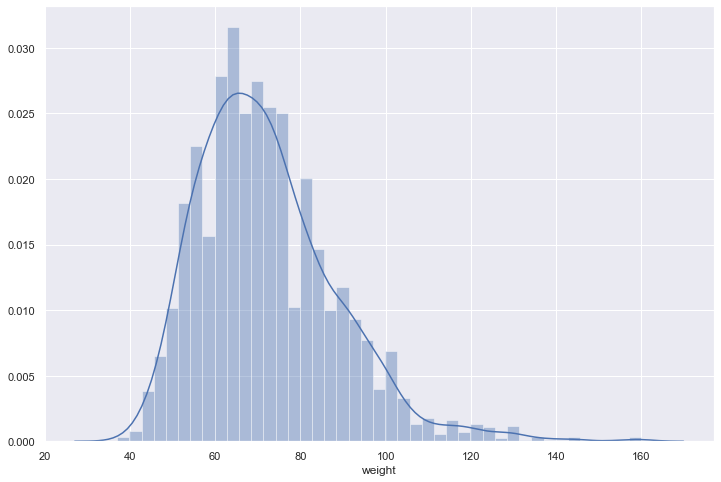

In [22]:
sns.distplot(amostra_weight)

#### Questão 4

**Transformação logarítmica da variável weight**

In [23]:
log_weight = np.log(amostra_weight)

In [24]:
statistic_log, pvalue_log = sct.normaltest(log_weight)
print('statistic_log =%.3f, pvalue_log =%.3f' % (statistic_log, pvalue_log))

statistic_log =45.915, pvalue_log =0.000


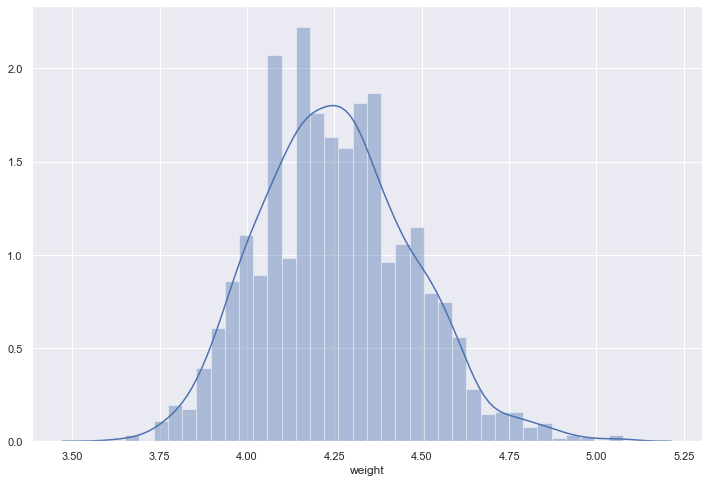

In [25]:
sns.distplot(log_weight)

((array([-3.50184707, -3.25811987, -3.12333914, ...,  3.12333914,
          3.25811987,  3.50184707]),
  array([3.61091791, 3.66356165, 3.66356165, ..., 5.0689042 , 5.07517382,
         5.07517382])),
 (0.2162605194297294, 4.254356966378166, 0.9968080333470736))

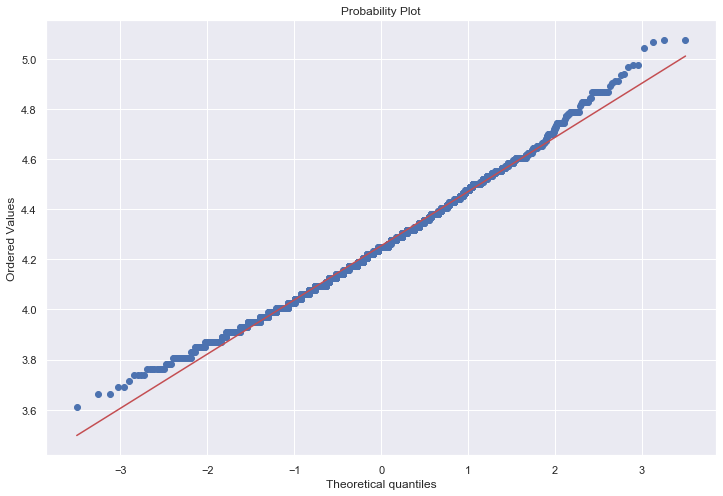

In [26]:
sct.probplot(log_weight, fit= True,plot = plt)

In [27]:
log_weight.mean()

4.254356966378166

**Questão 5**

In [28]:
bra = athletes.loc[athletes['nationality']=='BRA']['height']
can = athletes.loc[athletes['nationality']=='CAN']['height']
usa = athletes.loc[athletes['nationality']=='USA']['height']

In [29]:
T_teste, pvalue5 = sct.ttest_ind(bra,usa, equal_var = False, nan_policy='omit')
print('T_teste =%.3f, pvalue5 =%.3f'%(T_teste,pvalue5))

T_teste =-3.223, pvalue5 =0.001


In [30]:
amostra_bra_menor = bra.sample(n=200, random_state=1)
amostra_usa_menor = usa.sample(n=200, random_state=1)
statistic_m, pvalue_m = sct.ttest_ind(amostra_bra_menor,amostra_usa_menor, equal_var = False, nan_policy='omit')
print('statistic_m =%.3f, pvalue_m =%.3f'%(statistic_m, pvalue_m))

statistic_m =-1.658, pvalue_m =0.098


**Questão 6**

In [31]:
T_test6, pvalue6 = sct.ttest_ind(bra,can, equal_var = False, nan_policy='omit')
print('T_test6 =%.3f, pvalue6 =%.3f'%(T_test6,pvalue6))

T_test6 =0.639, pvalue6 =0.523


###### Questão 7

In [32]:
T_test7, pvalue7= sct.ttest_ind(usa,can, equal_var = False, nan_policy='omit')
print('T_test7=%.3f, pvalue7=%.3f'% (T_test7, pvalue7))

T_test7=3.517, pvalue7=0.000


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [33]:
def q1():
    alpha = 0.05
    stat,p = sct.shapiro(aux)
    R = p > alpha
    return bool(R)
    pass


__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

Ainda que o histograma e o quantile-quantile plot indiquem a existência da normalidade na distribuição, a estatítica do teste
apontou para a rejeição da hipótese nula (normalidade dos dados), a presença de aoutliers pode ser uma possível explicação 
para a incoerência entre os gráficos e a estatística de teste, outra razão possível está no tamanho da amostra

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [34]:
def q2():
    alpha = 0.05
    stat_jb,pv = sct.jarque_bera(aux)
    st_jb = pv > alpha
    return bool(st_jb)
    pass

__Para refletir__:

* Esse resultado faz sentido?

In [35]:
sct.kurtosis(aux,nan_policy = "omit")

-0.046799141975459424

In [36]:
# o cálculo da curtose indica que a curva apresenta um valor de curtose menor do que de uma normal o que está condizendo com o 
# teste de Jarque-Bera, dado que esse teste é baseado também nessa medida. Para uma curva norma 0 valor da curtose = 3

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [37]:
def q3():
    weight= get_sample(athletes, "weight", n=3000, seed=42)
    statistic, pvalue = sct.normaltest(weight)
    alpha = 0.05
    stats_normal = pvalue > alpha
    return bool(stats_normal)
    pass

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

A estatística do teste condiz com o resultado do gráfico já que a plotagem indica a possibilidade de uma distribuição
diferente de uma normal, corrobora também com o resultado do teste o QQplot que mostra valores que não se acomodam de acordo 
com os valores médios.


## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [38]:
def q4():
    weight= get_sample(athletes, "weight", n=3000, seed=42)
    log_weight = np.log(weight)
    statistic_log, pvalue_log = sct.normaltest(log_weight)
    alpha = 0.05
    stats_normal_log = pvalue_log > alpha
    return bool(stats_normal_log)
    pass

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

Ainda que o log da variável weight tenha sido utilizado e a assimetria da curva tenha diminuido a curva não se comporta como de 
uma normal.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [39]:
def q5():
    bra = athletes.loc[athletes['nationality']=='BRA']['height']
    usa = athletes.loc[athletes['nationality']=='USA']['height']
    alpha = 0.05
    T_test5, pvalue5 = sct.ttest_ind(bra,usa, equal_var = False, nan_policy='omit')
    R_ttest5 = pvalue5 > alpha
    return bool(R_ttest5)
    pass

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [40]:
def q6():
    bra = athletes.loc[athletes['nationality']=='BRA']['height']
    can = athletes.loc[athletes['nationality']=='CAN']['height']
    T_test6, pvalue6 = sct.ttest_ind(bra,can, equal_var = False, nan_policy='omit')
    R_ttest6 = pvalue6> alpha
    return bool(R_ttest6)
    pass

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [41]:
def q7():
    can = athletes.loc[athletes['nationality']=='CAN']['height']
    usa = athletes.loc[athletes['nationality']=='USA']['height']
    T_test7, pvalue7= sct.ttest_ind(usa,can, equal_var = False, nan_policy='omit')
    return round(float(pvalue7),8)
    pass

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

Como foi obtido um p-valor menor do que 5% (aplha) a hipótese nula foi portanto rejeitada, com isso, não temos evidências para afirmar a igualdade das médias da altura para atletas canadenses e estadunidenses.